## Option 2: Pymaceuticals Inc

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pymaceuticals/Pymaceuticals_Example.pdf) for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
# Read CSV
trial_path=("raw_data/clinicaltrial_data.csv")
drug_path=("raw_data/mouse_drug_data.csv")

trial_df=pd.read_csv(trial_path,low_memory=False)
drug_df=pd.read_csv(drug_path,low_memory=False)

trial_df.head()
drug_df.head()

#merge the datasets
df=trial_df.merge(drug_df, on="Mouse ID")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [80]:
drugs_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

df_subset = df[df['Drug'].isin(drugs_list)]

In [93]:
#average tumor volume per timepoint per drug

timepoint_drug_groups=df_subset.groupby(['Drug','Timepoint'])
avg_tumor_volume_per_drug_per_timepoint = pd.DataFrame(timepoint_drug_groups['Tumor Volume (mm3)'].mean())

avg_tumor_volume_per_drug_per_timepoint.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562

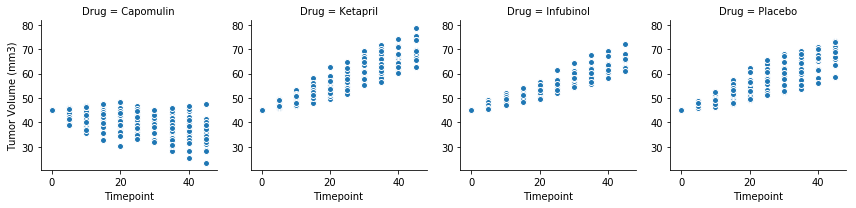

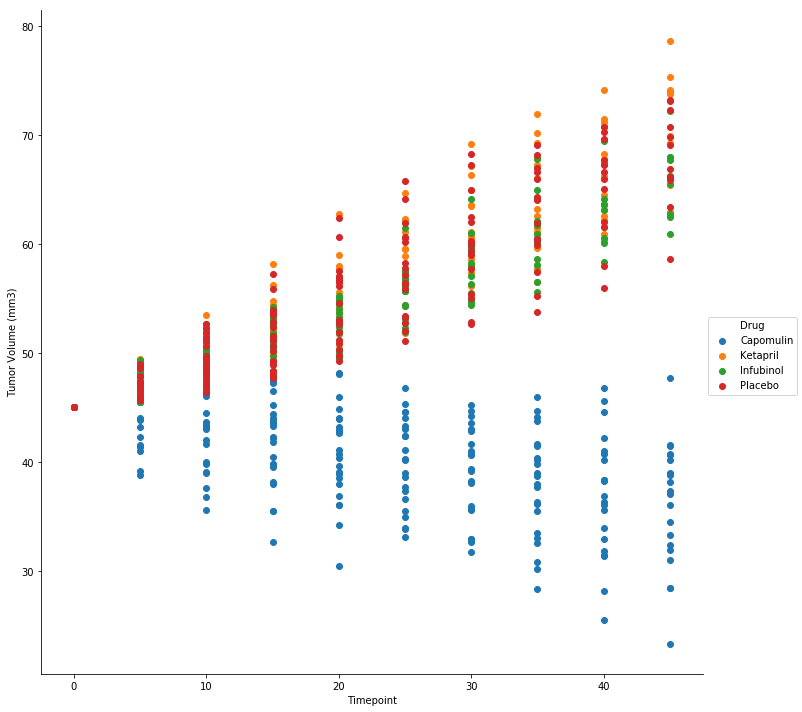

In [83]:
#* Create a scatter plot that shows how the tumor volume changes over time for each treatment.

#STRATEGY 1: Generate distinct scatter plots for each drug
scatter_data=df_subset[["Drug","Timepoint","Tumor Volume (mm3)"]]
g = sns.FacetGrid(scatter_data, col="Drug", aspect=1)
g = g.map(plt.scatter, "Timepoint", "Tumor Volume (mm3)", edgecolor="w")
plt.show()

#STRATEGY 2: All drugs on the same plot, marked in different colors
#Facet Grid
fg = sns.FacetGrid(data=df_subset, hue='Drug', aspect=1, size=10)
fg.map(plt.scatter, 'Timepoint', 'Tumor Volume (mm3)').add_legend()
plt.show()

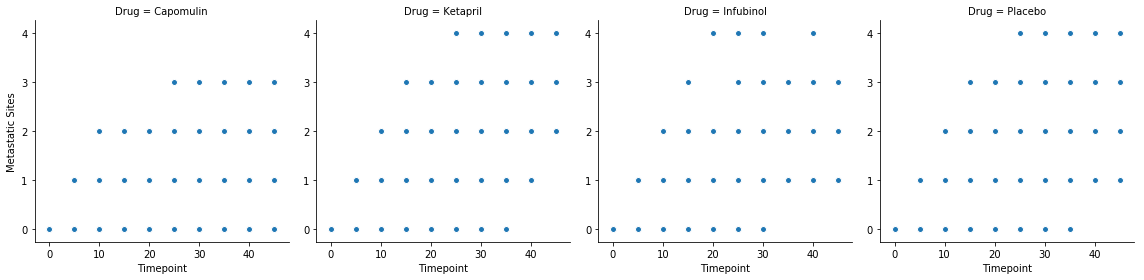

In [84]:
#* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) 
#(cancer spreading) sites changes over time for each treatment.

#STRATEGY 1: Generate distinct scatter plots for each drug
scatter_data=df_subset[["Drug","Timepoint","Metastatic Sites"]]
g = sns.FacetGrid(scatter_data, col="Drug", size=4)
g = g.map(plt.scatter, "Timepoint", "Metastatic Sites", edgecolor="w")
plt.show()

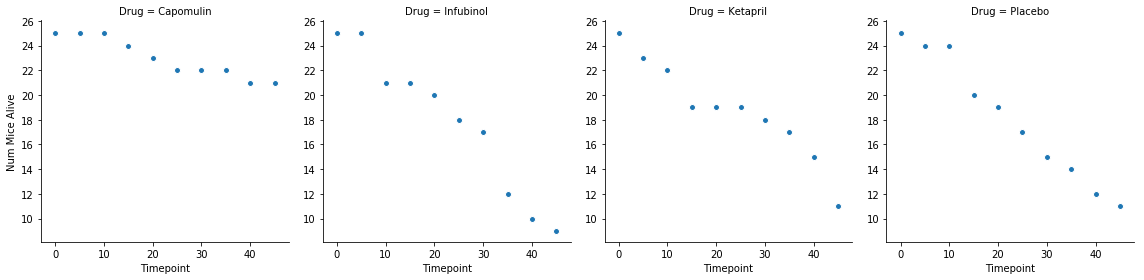

In [85]:
#* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
#Number of surviving mice per drug per timepoint
survival_counts=timepoint_drug_groups.count().reset_index()
survival_counts=survival_counts.rename(columns={"Mouse ID":"Num Mice Alive"})
survival_counts=survival_counts.loc[:,['Drug','Timepoint','Num Mice Alive']]

#survival_counts

x=survival_counts['Timepoint']
y=survival_counts['Num Mice Alive']

g = sns.FacetGrid(survival_counts, col="Drug", size=4)
g = g.map(plt.scatter, "Timepoint", "Num Mice Alive", edgecolor="w")
plt.show()

In [102]:
df=avg_tumor_volume_per_drug_per_timepoint.reset_index()
start_values = df.loc[df['Timepoint']==0]
end_values = df.loc[df['Timepoint']==45]

#combine start and end values into a single dataframe
drug_start_and_end_values = start_values.merge(end_values, on='Drug')

#subset only the bits we need
drug_start_and_end_values = drug_start_and_end_values.iloc[:,[0,2,4]]

#give columns reasonable names
drug_start_and_end_values.columns=("Drug","Start","End")

#drug_start_and_end_values['Avg. Change in Tumor Size'] = drug_start_and_end_values['Start']-drug_start_and_end_values['End']

#Compute avg % change in Tumor size
drug_start_and_end_values['% Change in Tumor Size'] = 100*round(((drug_start_and_end_values['End']/drug_start_and_end_values['Start'])-1),3)

#view the dataframe
drug_start_and_end_values

,Drug,Start,End,% Change in Tumor Size
0,Capomulin,45.0,36.236114,-19.5
1,Infubinol,45.0,65.755562,46.1
2,Ketapril,45.0,70.662958,57.0
3,Placebo,45.0,68.084082,51.3


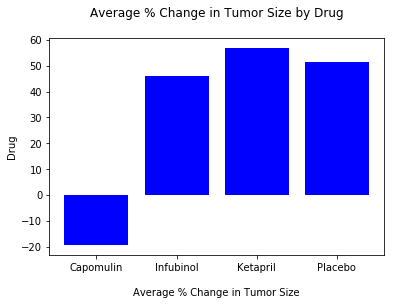

In [103]:
#BAR CHART

plt.bar(drug_start_and_end_values['Drug'], drug_start_and_end_values['% Change in Tumor Size'], color='b')

plt.title("Average % Change in Tumor Size by Drug\n")
plt.xlabel("\nAverage % Change in Tumor Size")
plt.ylabel("Drug")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


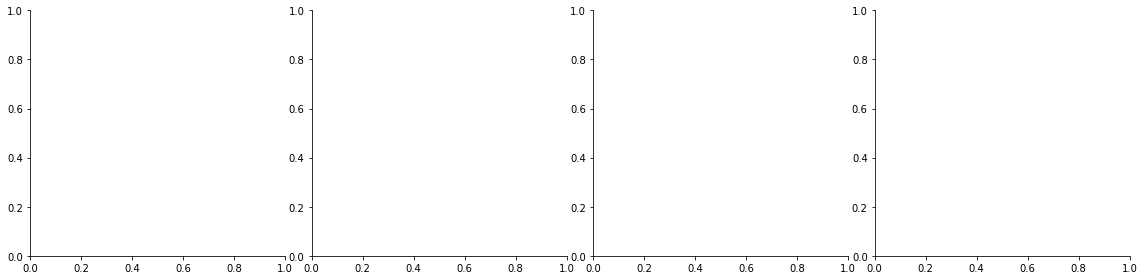

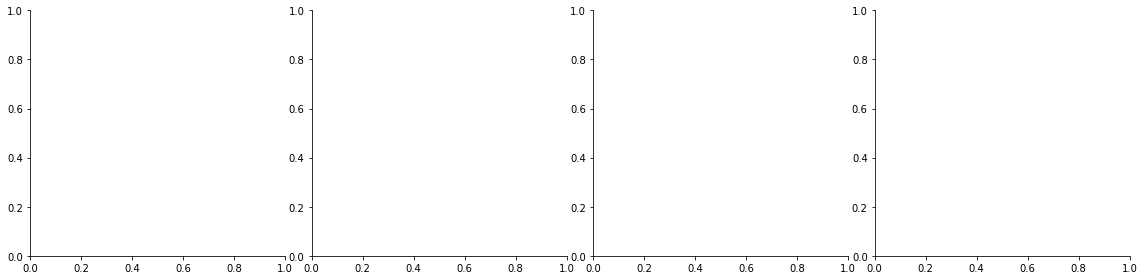

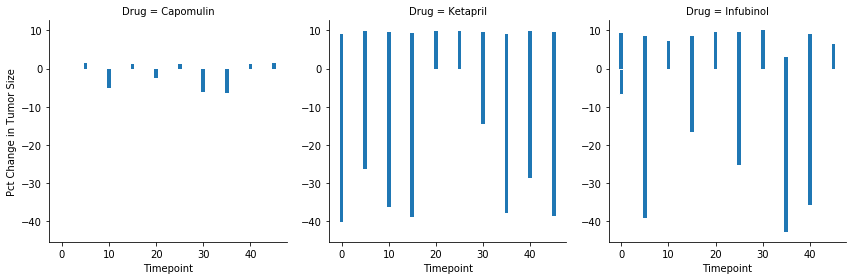

In [88]:
#this was a crazy way I did the last bit when I misinterpreted what it was asking... 
#wanted to save the code but you can ignore

#* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


#compute % tumor volume change per drug per day
vol_over_time=df_subset[["Drug","Timepoint","Tumor Volume (mm3)"]]

#vol_over_time.iloc[:,2]

current_value=0
previous_value=0

current_values=[]
previous_values=[]
diffs=[0]
'''
for i in range(1,len(vol_over_time['Tumor Volume (mm3)'])):
    #print(vol_over_time.iloc[i,0])
    x.append(vol_over_time.iloc[i,0])
    if vol_over_time.iloc[i,0]==vol_over_time.iloc[i-1,0]:
        y.append("Same Drug")
    else: 
        y.append("Different Drug")
    
'''
vol_over_time['Pct Chg']=0

for i in range(1,len(vol_over_time['Tumor Volume (mm3)'])):
    if vol_over_time.iloc[i,0]==vol_over_time.iloc[i-1,0]: #if the drug in this row is the same as last row
        current_values.append(vol_over_time.iloc[i,2])
        previous_values.append(vol_over_time.iloc[i-1,2])
        diffs.append(100*(vol_over_time.iloc[i,2]/vol_over_time.iloc[i-1,2]-1))
        vol_over_time.iloc[i,3]=100*(vol_over_time.iloc[i,2]/vol_over_time.iloc[i-1,2]-1)
    else:
        vol_over_time.iloc[i,3]=0
        current_values.append(0)
        previous_values.append(0)
        diffs.append(0)
        
vol_over_time.head()        

#for drug in vol_over_time['Drug']:
#    for i in range(1,len(vol_over_time['Tumor Volume (mm3)'])):
#        x.append(vol_over_time.iloc[i,2])

#x
 #          vol_over_time['test']=vol_over_time.iloc()
#    for row in vol_over_time['Tumor Volume (mm3)']:
 

diffs=pd.DataFrame(diffs)

vol_over_time=vol_over_time.reset_index()

diffs.columns = ['Pct Change in Tumor Size']
diffs=diffs.reset_index()


vol_over_time=vol_over_time.merge(diffs, on='index')

vol_over_time=vol_over_time.rename(columns={'0': 'Diff'})

vol_over_time.head()


#this produces some pretty inscrutable plots but oh well
g = sns.FacetGrid(vol_over_time, col="Drug", size=4)
g = g.map(plt.bar, "Timepoint", "Pct Change in Tumor Size", edgecolor="w")
plt.show()
